In [2]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt

from functools import partial
import traceback


In [3]:
filename =join('my_images', 'IMG_001.jpg')

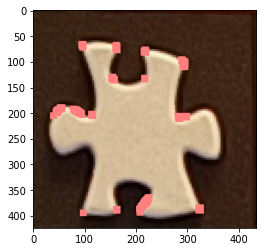

In [44]:

image= cv2.imread(filename)
image = image[10:434, 10:445]
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray= np.float32(gray)

#harris_corners= cv2.cornerHarris(gray, 9, 3, 0.05)
harris_corners= cv2.cornerHarris(gray, 5, 5, 0.05)

kernel= np.ones((7,7), np.uint8)

harris_corners= cv2.dilate(harris_corners, kernel, iterations= 2)


#image[harris_corners > 0.025 * harris_corners.max()]= [255,127,127]
image[harris_corners > 0.15 * harris_corners.max()]= [255,127,127]

plt.imshow( image)




In [ ]:



# read the image
img = cv2.imread(filename)
img = img[10:434, 10:445]
# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)

# we iterate through each corner,
# making a circle at each point that we think is a corner.
for i in corners:
	x, y = i.ravel()
	cv2.circle(img, (x, y), 3, 255, -1)

plt.imshow(img), plt.show()
plt.imshow(gray), plt.show()


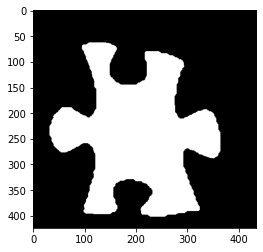

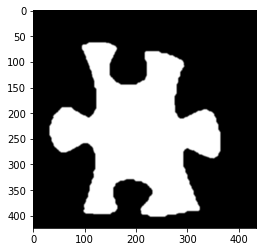

(<matplotlib.image.AxesImage at 0xd264e20>, None)

In [19]:
# read the image
img = cv2.imread(filename)
img = img[10:434, 10:445]
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray, cmap='gray'), plt.show()
gray   = cv2.medianBlur(gray, ksize=5)
thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray'), plt.show()
thresh = cv2.blur(thresh, ksize=(3, 3))

# plt.imshow(img, cmap='gray'), plt.show()
# plt.imshow(gray, cmap='gray'), plt.show()
plt.imshow(thresh, cmap='gray'), plt.show()

In [4]:
#image = cv2.imread('image.png', cv2.IMREAD_UNCHANGED);
image = cv2.imread(filename)
image = image[10:434, 10:445]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# getting mask with connectComponents
ret, labels = cv2.connectedComponents(binary)
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255
    cv2.imshow('component',mask)
    cv2.waitKey(0)

# getting ROIs with findContours
contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    ROI = image[y:y+h,x:x+w]
    cv2.imshow('ROI', ROI)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::pointSetBoundingRect'


: 